In [1]:
import os
import glob
import tqdm
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Visualize the data

In [6]:
sample_data_path = '../dataset/processed/c1s01/6.pkl'
with open(sample_data_path, 'rb') as f:
    sample = pickle.load(f)

In [3]:
# zephyr
ts = sample['zephyr']['ECG']['Time'][0]
start_t = ts + pd.Timedelta(minutes=1)
end_t = ts + pd.Timedelta(minutes=2)

In [4]:
def find_indices(data, start_t, end_t):
    start_t = pd.to_datetime(start_t)
    end_t = pd.to_datetime(end_t)

    # get the index for the start_t and end_t
    start_idx = 0
    end_idx = 0

    for i in range(len(data['Time'])):
        if data['Time'][i] >= start_t:
            start_idx = i
            break

    for i in range(len(data['Time'])):
        if data['Time'][i] >= end_t:
            end_idx = i
            break
    return start_idx, end_idx

CGM_idx: 19140.0, Glucose: 137.0


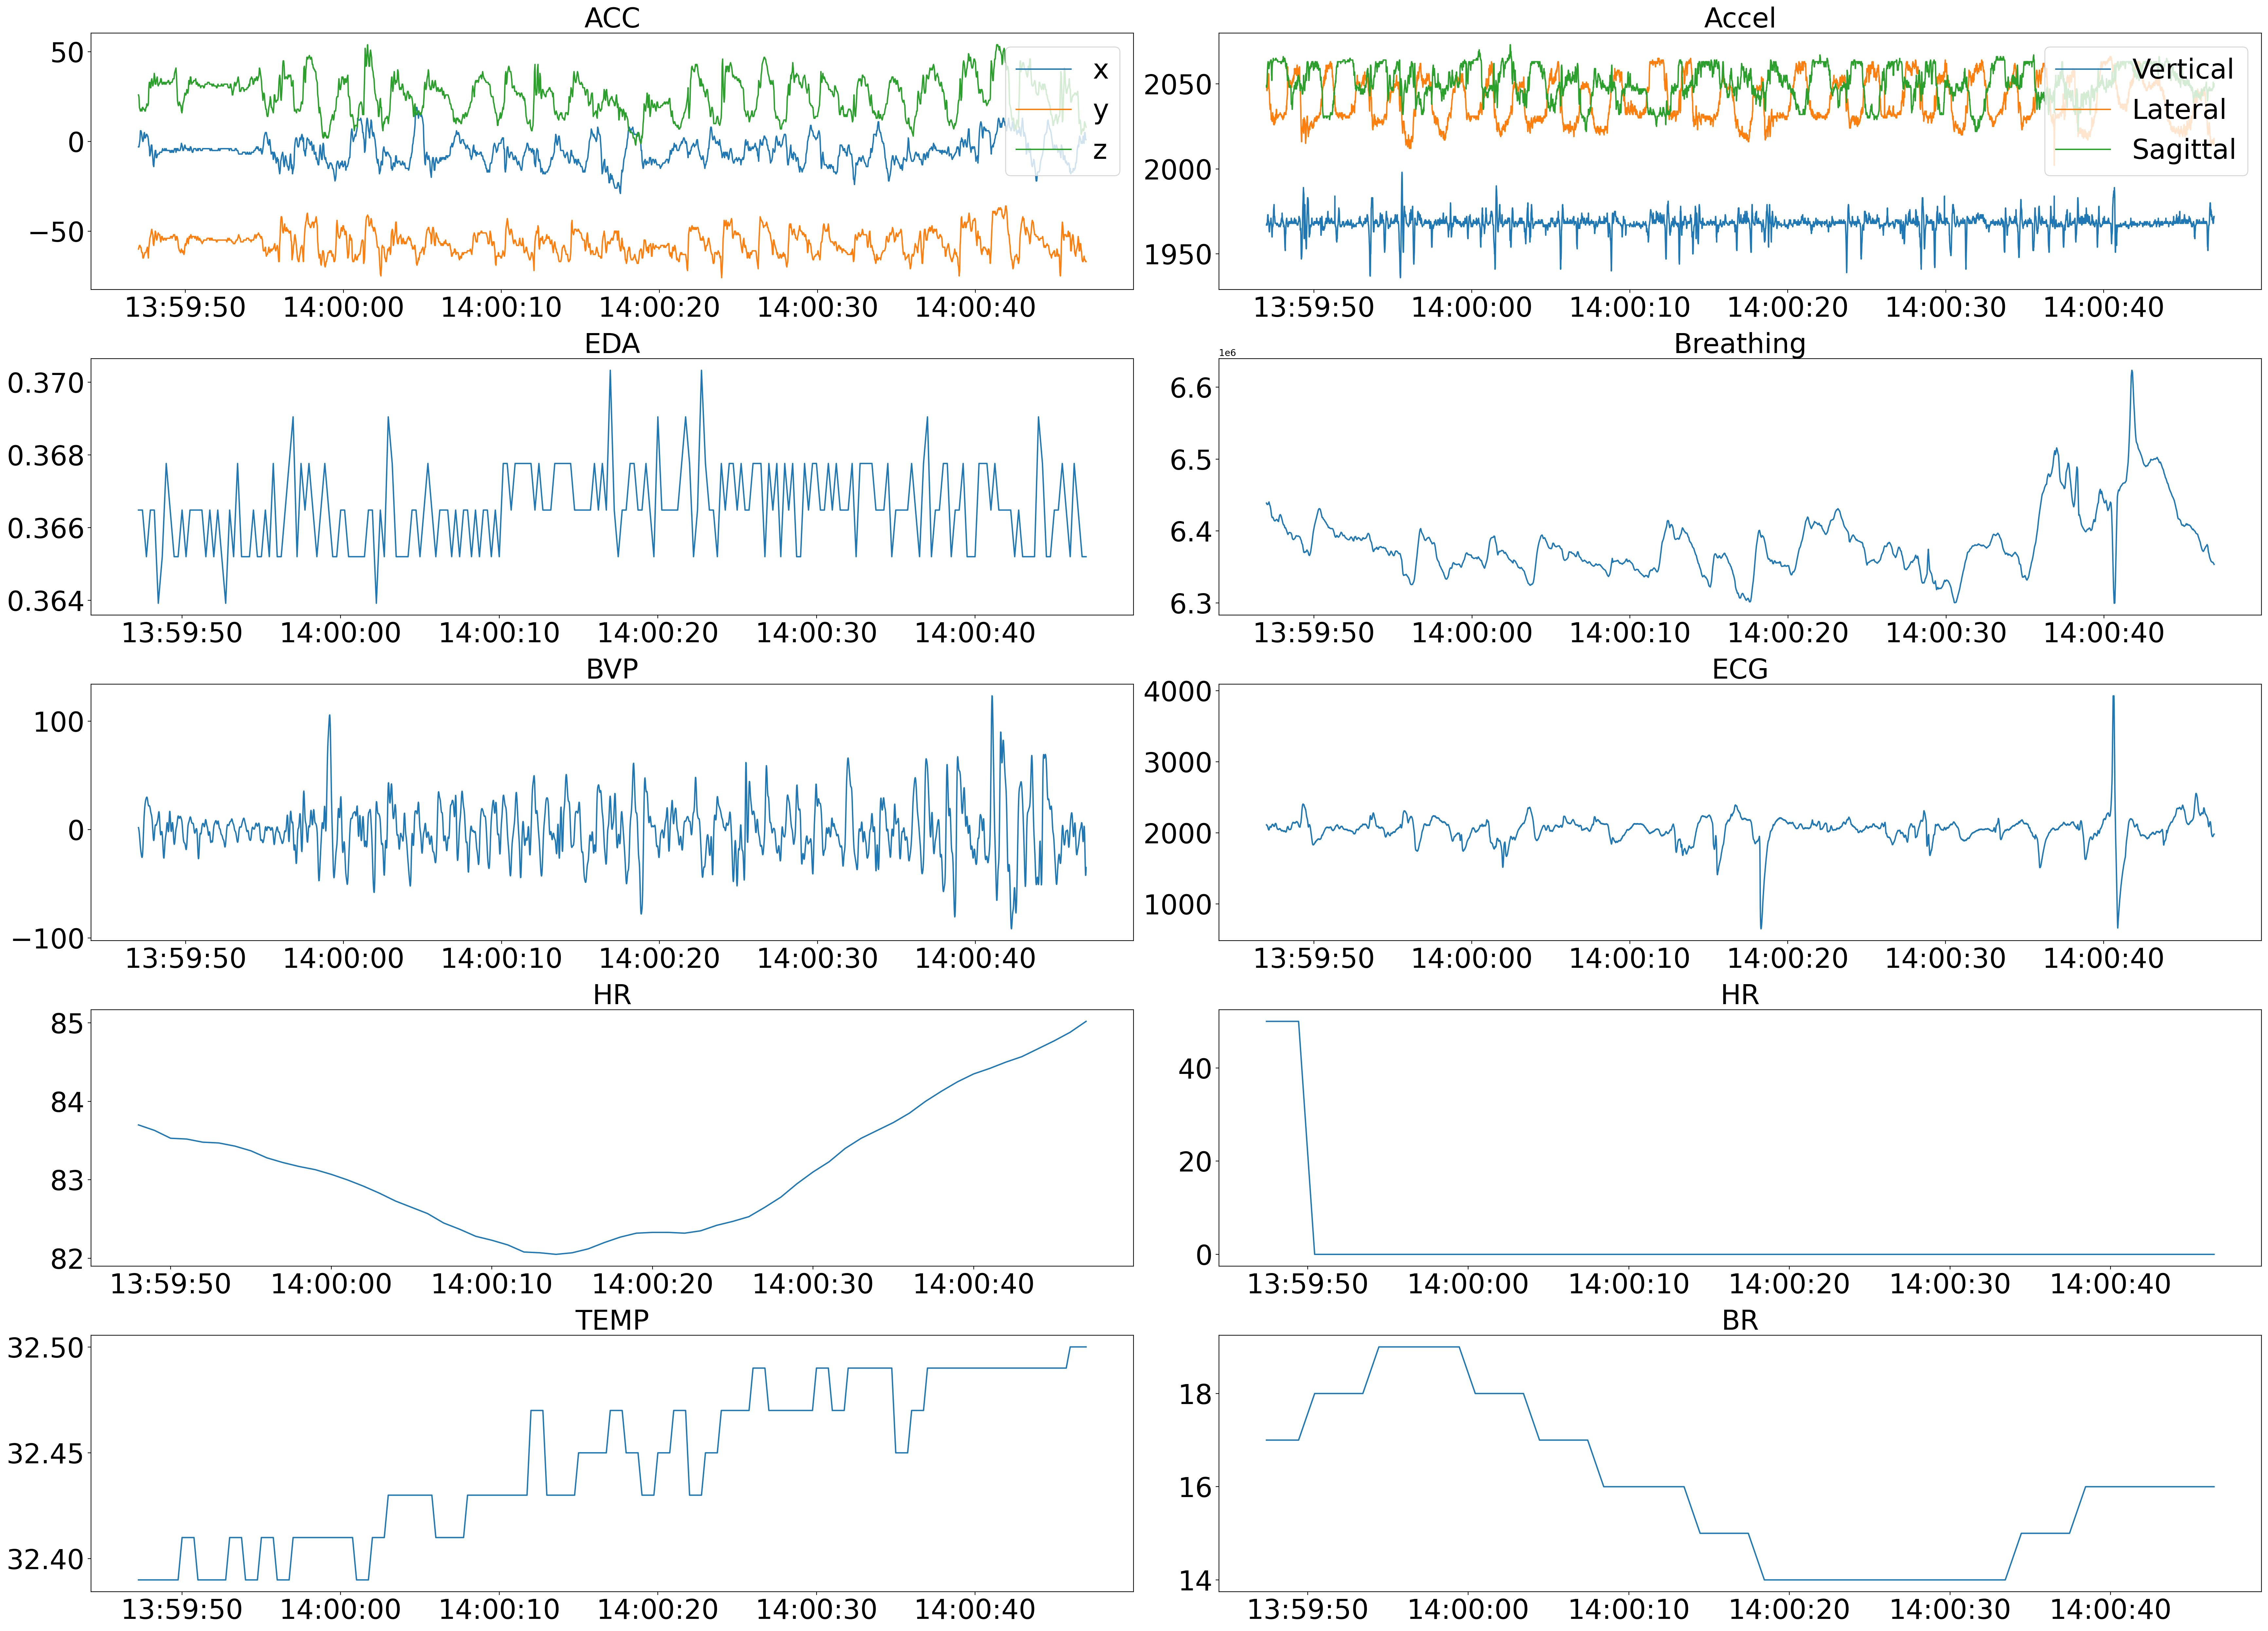

In [5]:
axis_font_size = 30
fig, ax = plt.subplots(5, 2, figsize=(35, 25), dpi=200)
start_idx, end_idx = find_indices(sample['zephyr']['Accel'], start_t, end_t)
ax[0,1].plot(sample['zephyr']['Accel']['Time'][start_idx:end_idx], sample['zephyr']['Accel']['Vertical'][start_idx:end_idx], label='Vertical')
ax[0,1].plot(sample['zephyr']['Accel']['Time'][start_idx:end_idx], sample['zephyr']['Accel']['Lateral'][start_idx:end_idx], label='Lateral')
ax[0,1].plot(sample['zephyr']['Accel']['Time'][start_idx:end_idx], sample['zephyr']['Accel']['Sagittal'][start_idx:end_idx], label='Sagittal')
ax[0,1].legend(fontsize=axis_font_size, loc='upper right')
# ax[0,1].get_xaxis().set_visible(False)
ax[0,1].tick_params(axis='x', labelsize=axis_font_size)
ax[0,1].tick_params(axis='y', labelsize=axis_font_size)
ax[0,1].set_title('Accel', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['zephyr']['Breathing'], start_t, end_t)
ax[1,1].plot(sample['zephyr']['Breathing']['Time'][start_idx:end_idx], sample['zephyr']['Breathing']['BreathingWaveform'][start_idx:end_idx])
# ax[1,1].get_xaxis().set_visible(False)
ax[1,1].tick_params(axis='x', labelsize=axis_font_size)
ax[1,1].tick_params(axis='y', labelsize=axis_font_size)
ax[1,1].set_title('Breathing', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['zephyr']['ECG'], start_t, end_t)
ax[2,1].plot(sample['zephyr']['ECG']['Time'][start_idx:end_idx], sample['zephyr']['ECG']['EcgWaveform'][start_idx:end_idx])
# ax[2,1].get_xaxis().set_visible(False)
ax[2,1].tick_params(axis='x', labelsize=axis_font_size)
ax[2,1].tick_params(axis='y', labelsize=axis_font_size)
ax[2,1].set_title('ECG', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['zephyr']['Summary'], start_t, end_t)
ax[3,1].plot(sample['zephyr']['Summary']['Time'][start_idx:end_idx], sample['zephyr']['Summary']['HR'][start_idx:end_idx])
# ax[3,1].get_xaxis().set_visible(False)
ax[3,1].tick_params(axis='x', labelsize=axis_font_size)
ax[3,1].tick_params(axis='y', labelsize=axis_font_size)
ax[3,1].set_title('HR', fontsize=axis_font_size)

ax[4,1].plot(sample['zephyr']['Summary']['Time'][start_idx:end_idx], sample['zephyr']['Summary']['BR'][start_idx:end_idx])
ax[4,1].tick_params(axis='x', labelsize=axis_font_size)
ax[4,1].tick_params(axis='y', labelsize=axis_font_size)
ax[4,1].set_title('BR', fontsize=axis_font_size)

# e4
start_idx, end_idx = find_indices(sample['e4']['ACC'], start_t, end_t)
ax[0, 0].plot(sample['e4']['ACC']['Time'][start_idx:end_idx], sample['e4']['ACC']['x'][start_idx:end_idx], label='x')
ax[0, 0].plot(sample['e4']['ACC']['Time'][start_idx:end_idx], sample['e4']['ACC']['y'][start_idx:end_idx], label='y')
ax[0, 0].plot(sample['e4']['ACC']['Time'][start_idx:end_idx], sample['e4']['ACC']['z'][start_idx:end_idx], label='z')
ax[0, 0].legend(fontsize=axis_font_size, loc='upper right')
# ax[0, 0].get_xaxis().set_visible(False) 
ax[0, 0].tick_params(axis='x', labelsize=axis_font_size)
ax[0, 0].tick_params(axis='y', labelsize=axis_font_size)
ax[0, 0].set_title('ACC', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['e4']['EDA'], start_t, end_t)
ax[1, 0].plot(sample['e4']['EDA']['Time'][start_idx:end_idx], sample['e4']['EDA']['EDA'][start_idx:end_idx])
# ax[1, 0].get_xaxis().set_visible(False)
ax[1, 0].tick_params(axis='x', labelsize=axis_font_size)
ax[1, 0].tick_params(axis='y', labelsize=axis_font_size)
ax[1, 0].set_title('EDA', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['e4']['BVP'], start_t, end_t)
ax[2, 0].plot(sample['e4']['BVP']['Time'][start_idx:end_idx], sample['e4']['BVP']['BVP'][start_idx:end_idx])
# ax[2, 0].get_xaxis().set_visible(False)
ax[2, 0].tick_params(axis='x', labelsize=axis_font_size)
ax[2, 0].tick_params(axis='y', labelsize=axis_font_size)
ax[2, 0].set_title('BVP', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['e4']['HR'], start_t, end_t)
ax[3, 0].plot(sample['e4']['HR']['Time'][start_idx:end_idx], sample['e4']['HR']['HR'][start_idx:end_idx])
# ax[3, 0].get_xaxis().set_visible(False)
ax[3, 0].tick_params(axis='x', labelsize=axis_font_size)
ax[3, 0].tick_params(axis='y', labelsize=axis_font_size)
ax[3, 0].set_title('HR', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['e4']['TEMP'], start_t, end_t)
ax[4, 0].plot(sample['e4']['TEMP']['Time'][start_idx:end_idx], sample['e4']['TEMP']['TEMP'][start_idx:end_idx])
ax[4, 0].tick_params(axis='x', labelsize=axis_font_size)
ax[4, 0].tick_params(axis='y', labelsize=axis_font_size)
ax[4, 0].set_title('TEMP', fontsize=axis_font_size)


print('CGM_idx: {}, Glucose: {}'.format(sample['Index'], sample['glucose']))
plt.tight_layout()
plt.show()

In [6]:
print(np.diff(sample['zephyr']['Accel']['Time']).mean() / np.timedelta64(1, 's'))

0.01


In [3]:
new_df = []
for d in tqdm.tqdm(glob.glob("/mnt/data2/mtseng/SeNSE/dataset/processed/c1s01/*")):
    
    with open(d, 'rb') as f:
        sample = pickle.load(f)
    
    mean_posture = sample['zephyr']['Summary']['Posture'].mean()
    mean_activity = sample['zephyr']['Summary']['Activity'].mean()

    row_data = {
        'Time': sample['Timestamp'],
        'Glucose': sample['glucose'],
        'Posture': mean_posture,
        'Activity': mean_activity
    }

    new_df.append(row_data)


  0%|          | 0/2704 [00:00<?, ?it/s]

100%|██████████| 2704/2704 [00:27<00:00, 99.46it/s] 


In [4]:
new_df = pd.DataFrame(new_df)

In [5]:
# sort by time
new_df = new_df.sort_values(by='Time')

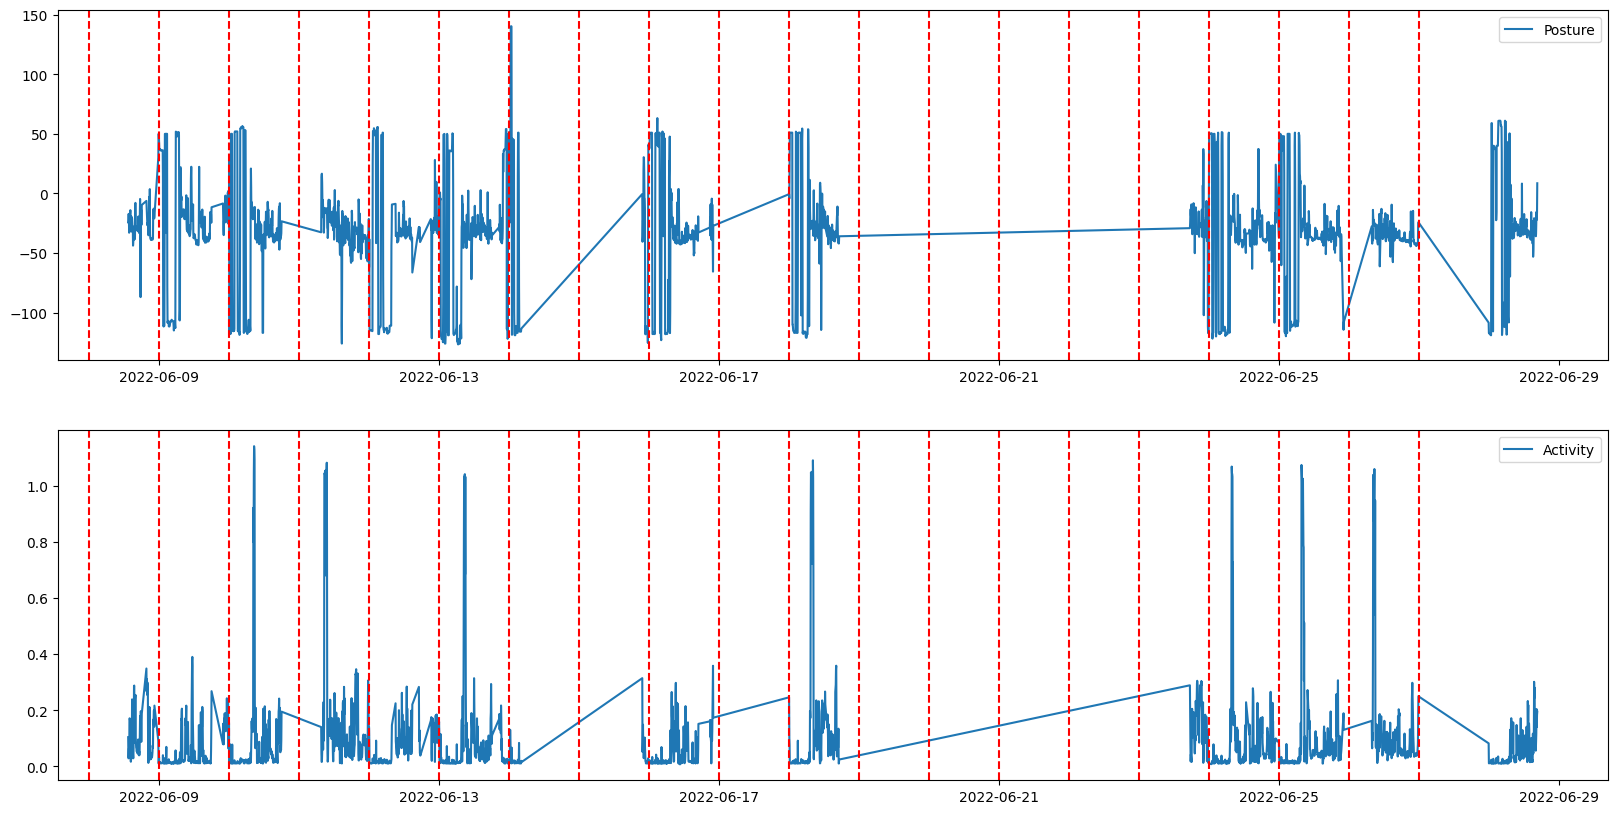

In [7]:
import datetime
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(new_df['Time'], new_df['Posture'], label='Posture')
ax[1].plot(new_df['Time'], new_df['Activity'], label='Activity')

start_t = new_df['Time'].iloc[0]
end_t = new_df['Time'].iloc[-1]
current_date = start_t.date()
while current_date < end_t.date():
    ax[0].axvline(pd.Timestamp(current_date), color='r', linestyle='--')
    ax[1].axvline(pd.Timestamp(current_date), color='r', linestyle='--')
    current_date += datetime.timedelta(days=1)

ax[0].legend()
ax[1].legend()
plt.show()


In [48]:
tmp1 = pd.read_csv('/mnt/data2/mtseng/SeNSE/dataset/raw/c1s01/zephyr/2022_06_12-21_15_04/ Record 7_2022_06_12-21_15_04_Accel.csv')
tmp2 = pd.read_csv('/mnt/data2/mtseng/SeNSE/dataset/raw/c1s01/zephyr/2022_06_13-11_32_09/ Record 8_2022_06_13-11_32_09_Accel.csv')

tmp = pd.concat([tmp1, tmp2])

In [49]:
# Ensure 'Time' is converted to datetime format
tmp['Time'] = pd.to_datetime(tmp['Time'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')

# Drop rows with NaT values in the 'Time' column
sample_time_df = tmp.dropna(subset=['Time'])

# Create a new column with the time in %H:%M format
sample_time_df['time_HM'] = sample_time_df['Time'].apply(lambda x: x.strftime('%H:%M'))

# Display the updated DataFrame with the new column
print(sample_time_df[['Time', 'time_HM', 'Vertical', 'Lateral', 'Sagittal']])

                           Time time_HM  Vertical  Lateral  Sagittal
0       2022-06-12 21:15:04.460   21:15      2044     2125      2079
1       2022-06-12 21:15:04.470   21:15      2043     2128      2077
2       2022-06-12 21:15:04.480   21:15      2044     2128      2077
3       2022-06-12 21:15:04.490   21:15      2046     2129      2077
4       2022-06-12 21:15:04.500   21:15      2047     2128      2079
...                         ...     ...       ...      ...       ...
2471295 2022-06-13 18:24:02.410   18:24      2023     2126      2063
2471296 2022-06-13 18:24:02.420   18:24      2021     2127      2063
2471297 2022-06-13 18:24:02.430   18:24      2021     2127      2062
2471298 2022-06-13 18:24:02.440   18:24      2019     2125      2063
2471299 2022-06-13 18:24:02.450   18:24      2018     2126      2063

[7484400 rows x 5 columns]


In [52]:
plot_sample_time_df = sample_time_df.drop_duplicates(subset='time_HM', keep='first')

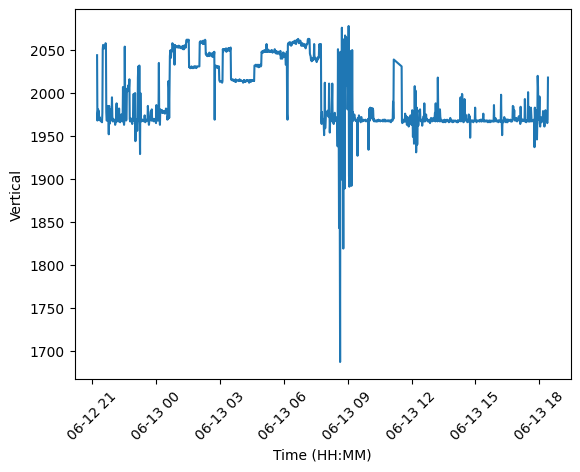

In [55]:
# Plot with formatted time
plt.plot(plot_sample_time_df['Time'], plot_sample_time_df['Vertical'], label='Vertical')
plt.xticks(rotation=45)
plt.xlabel('Time (HH:MM)')
plt.ylabel('Vertical')
plt.show()
